In [3]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Understanding a Simple Weight Prediction Model

## Loading and Preparing the Data

### Load Webpage & Extract Content into DataFrame

In [38]:
# Load data from UCLA SOCR database containing height and weight measurements
# pd.read_html() extracts HTML tables from a webpage
# header=0 indicates the first row contains column names
# [0] selects the first table from the page
# [['Height(Inches)','Weight(Pounds)']] selects only these two columns
url = 'http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html'

height_weight_df = pd.read_html(url, header=0)[0][['Height(Inches)','Weight(Pounds)']]

In [39]:
# Display information about the DataFrame structure
# Shows: number of entries, column names, data types, and memory usage
height_weight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [40]:
# Generate descriptive statistics for the dataset
# Includes: count, mean, std, min, 25%, 50%, 75%, max
height_weight_df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


### Count Records

In [41]:
# Count the total number of records in the dataset
num_records = len(height_weight_df)
print(num_records)

25000


### Place in x and y variables

In [42]:
# Extract height values as the independent variable (feature)
# .values converts pandas Series to numpy array
# .reshape(num_records, 1) converts 1D array to 2D column vector
# This shape is required by scikit-learn's linear regression
x = height_weight_df['Height(Inches)'].values.reshape(num_records, 1)

# Extract weight values as the dependent variable (target)
# Same reshaping applied for consistency
y = height_weight_df['Weight(Pounds)'].values.reshape(num_records, 1)

In [29]:
x

array([[65.78331],
       [71.51521],
       [69.39874],
       ...,
       [64.69855],
       [67.52918],
       [68.87761]])

In [30]:
y

array([[112.9925],
       [136.4873],
       [153.0269],
       ...,
       [118.2655],
       [132.2682],
       [124.8742]])

## Fitting a Linear Regression Model

### Fit Model

In [44]:
# Create and fit a linear regression model
# .fit(x, y) trains the model to find the best-fit line: y = mx + b
# The model learns the coefficient (slope) and intercept
model = linear_model.LinearRegression().fit(x, y)

# Display the trained model object
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Generate Equation

In [46]:
# Generate the regression equation in readable format
# model.intercept_[0] is the y-intercept (b)
# model.coef_.T[0][0] is the slope (m)
# Equation format: ŷ = b + m*x₁
print("ŷ = " + str(model.intercept_[0]) + " + " + str(model.coef_.T[0][0]) + " x₁")

# Output: ŷ = -82.576 + 3.083 x₁
# Interpretation: For each 1-inch increase in height, weight increases by ~3.08 pounds

ŷ = -82.57574306454093 + 3.0834764454029666 x₁


### Compute Mean Absolute Error

In [47]:
# Generate predictions using the trained model
# y_pred contains the predicted weights for all heights in x
y_pred = model.predict(x)

# Calculate Mean Absolute Error (MAE)
# MAE measures the average absolute difference between predicted and actual values
# Lower MAE indicates better model performance
mae = mean_absolute_error(y, y_pred)
print(mae)  # Output: ~8.04 pounds average error

8.037502348939364


### Plot Regression Line ± Error

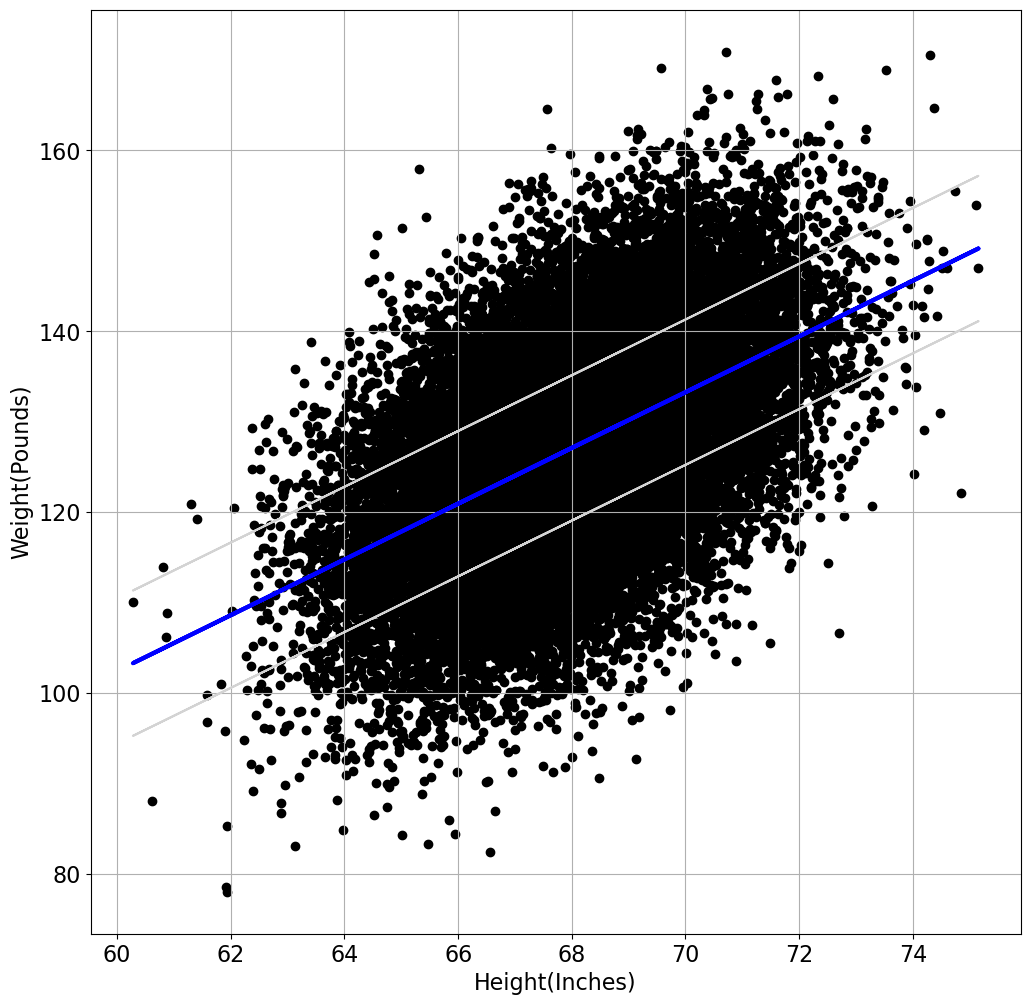

In [48]:
# Create a large figure for better visibility
plt.figure(figsize=(12, 12))

# Increase font size for readability
plt.rcParams.update({'font.size': 16})

# Plot actual data points as black scatter plot
# Each point represents one person's height and weight
plt.scatter(x, y, color='black')

# Plot the regression line (predicted values) in blue
# This line represents the model's predictions
plt.plot(x, y_pred, color='blue', linewidth=3)

# Plot upper error boundary (MAE above predictions)
# Shows the average positive deviation from the regression line
plt.plot(x, y_pred + mae, color='lightgray')

# Plot lower error boundary (MAE below predictions)
# Shows the average negative deviation from the regression line
plt.plot(x, y_pred - mae, color='lightgray')

# Add labels and formatting
plt.title('')  # Title left empty
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.grid(True)  # Add grid for easier reading
plt.show()


In [52]:
# there are many times in which the actuals are 20–25 
# pounds away from the prediction. Yet the mean absolute error can fool you into thinking that the error 
# is always closer to 8. This is why it is essential to visualize the error of the model to understand its 
# distribution. Judging from this graph, we can tell that there are no red flags that stand out about this 
# distribution, such as residuals being more spread out for one range of heights than for others. Since 
# it is more or less equally spread out, we say it’s homoscedastic. In the case of linear regression, this 
# is one of many model assumptions you should test for, along with linearity, normality, independence, 
# and lack of multicollinearity (if there’s more than one feature). These assumptions ensure that you 
# are using the right model for the job. In other words, the height and weight can be explained with a 
# linear relationship, and it is a good idea to do so, statistically speaking.

### Calculate Pearsons Correlation Coefficient

In [53]:
# With this model, we are trying to establish a linear relationship between x height and y weight. This 
# association is called a linear correlation. One way to measure this relationship’s strength is with Pear
# son’s correlation coefficient. This statistical method measures the association between two variables 
# using their covariance divided by their standard deviations. It is a number between -1 and 1 whereby 
# the closer the number is to 0, the weaker the association is. If the number is positive, there is a pos
# itive association, and if it’s negative, there is a negative one. In Python, you can compute Pearson’s 
# correlation coefficient with the pearsonr function from scipy

In [49]:
# Calculate Pearson's Correlation Coefficient
# Measures the linear relationship between height and weight
# Range: -1 (perfect negative) to +1 (perfect positive correlation)
# 0 indicates no linear relationship
corr, pval = pearsonr(x[:, 0], y[:, 0])
print(corr)  # Output: ~0.503 (moderate positive correlation)

0.502858520602844


### Two-tailed p-value

In [50]:
# Test statistical significance using p-value
# p-value < 0.05 indicates the correlation is statistically significant
# (less than 5% chance the relationship occurred by random chance)
print(pval < 0.05)  # Output: True (relationship is statistically significant)

True


In [51]:
# SUMMARY OF RESULTS:
# - Model equation: Weight = -82.58 + 3.08 × Height
# - Average prediction error: ~8.04 pounds
# - Correlation: 0.503 (moderate positive relationship)
# - Statistical significance: Yes (p < 0.05)
# - Interpretation: Height explains about 25% of weight variation (r² = 0.503²)

In [54]:
# we are asked to explain why someone who is 71 
# inches tall was predicted to have a weight of 134 pounds but instead weighed 18 pounds more. Judging 
# from what we know about the model, this margin of error is not unusual even though it’s not ideal. 
# However, there are many circumstances in which we cannot expect this model to be reliable. What 
# if we were asked to predict the weight of a person who is 56 inches tall with the help of this model? 
# Could we assure the same level of accuracy? Definitely not, because we fit the model on the data of 
# subjects no shorter than 63 inches. The same is true if we were asked to predict the weight of a 9-year
# old, because the training data was for 18-year-olds.

In [55]:
# this weight prediction model was not a realistic example. If you want
# ed to be more accurate but—more importantly—faithful to what can really impact the weight of an 
# individual, you would need to add more variables. You can add—say—gender at birth, age, diet, and 
# activity levels. This is where it gets interesting because you have to make sure it is fair to include them, 
# or to exclude them. For instance, if gender were included and most of our dataset was composed of 
# males, how could you ensure accuracy for females? This is what is called selection bias. And what if 
# weight had more to do with lifestyle choices and circumstances such as poverty and pregnancy than 
# gender? If these variables aren’t included, this is called omitted variable bias. And then, does it make 
# sense to include the sensitive gender variable at the risk of adding bias to the model?